In [ ]:
#objective: Predict acceptibility of a car

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [10]:
#load data
df = pd.read_table('../datasets/car.data', sep=",", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class']

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
#get shape
df.shape


(1728, 7)

In [13]:
#get descriptive statistics
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [14]:
#recode class
cleanup_nums = {"class":{"unacc":1, "acc":2, "good":3, "v-good":4,"vgood":4}}
#unacc: unacceptible, acc: acceptible, good: good,   v-good: very good
df.replace(cleanup_nums, inplace=True)

In [15]:
#one hot encode everything other than class
df_buying = pd.get_dummies(df.buying)
df_maint = pd.get_dummies(df.maint)
df_doors = pd.get_dummies(df.doors)
df_persons = pd.get_dummies(df.persons)
df_lugboot = pd.get_dummies(df.lug_boot)
df_safety = pd.get_dummies(df.safety)

In [16]:
#combine data
df_new = pd.concat([df_buying,df_maint,df_doors,df_persons,df_lugboot,df_safety, df['class']],axis=1) 

In [17]:
df_new.head()

,high,low,med,vhigh,high,low,med,vhigh,2,3,...,2,4,more,big,med,small,high,low,med,class
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1


In [48]:
df['class'].describe()

count     1728
unique       4
top          1
freq      1210
Name: class, dtype: int64

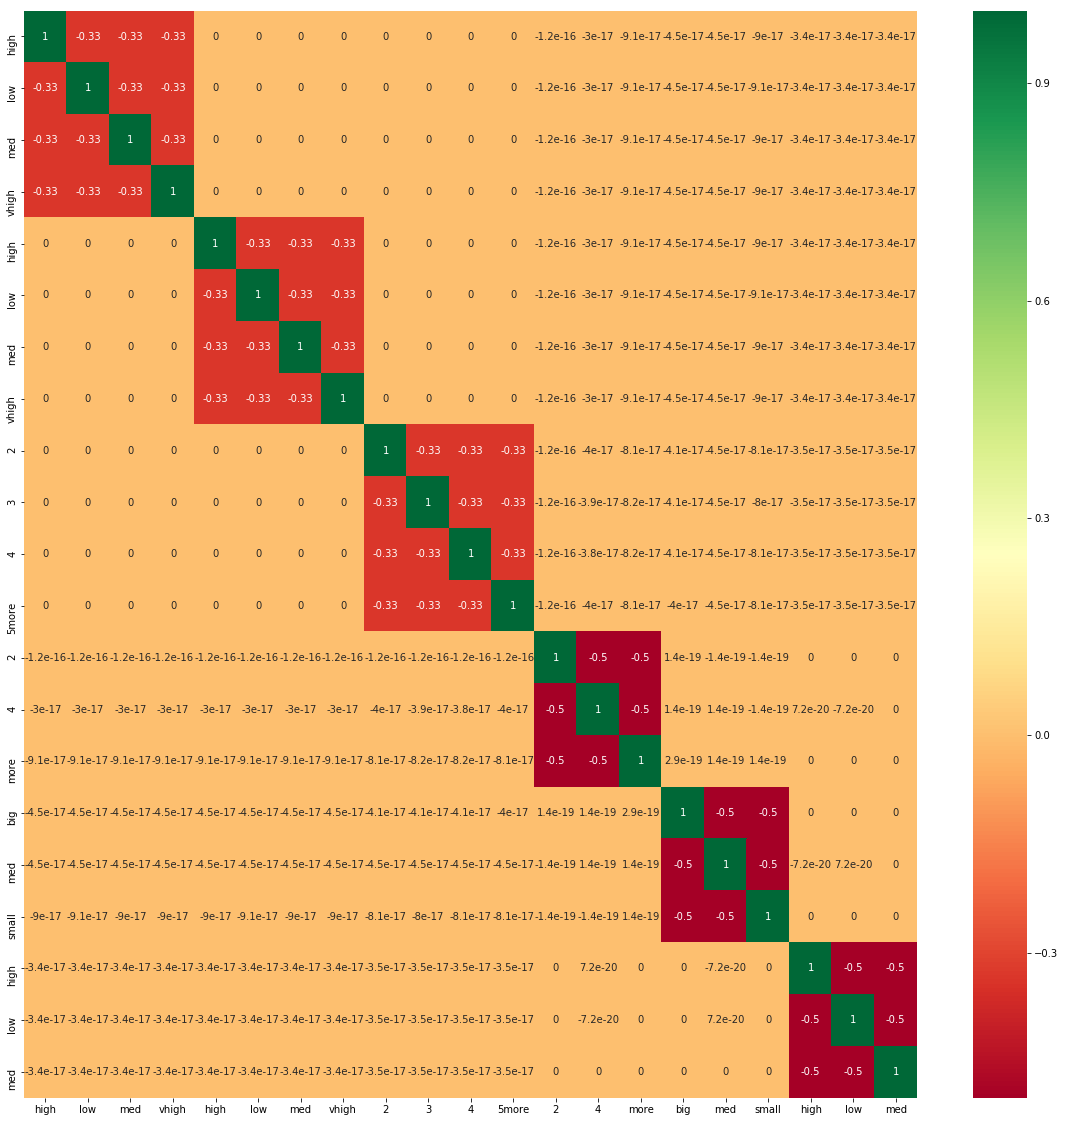

In [18]:
#correlation
x = df_new.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [49]:
#split data into train and test
X = df_new.drop('class', axis=1)
y = df_new['class']
y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ValueError: invalid literal for int() with base 10: 'vgood'

In [44]:
y_test.head()

1233    1
592     2
625     1
1546    1
730     1
Name: class, dtype: object

In [34]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#perform classification
array = df_new.values
X = array[:,0:21]
Y = array[:,21]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'unknown'

In [35]:
#use rf and others
#try random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

ValueError: Unknown label type: 'unknown'

In [ ]:
#perform on test data

In [ ]:
#perform confusion matrix